**# Pandas foundation L2 EDA**


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train.csv


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Age')

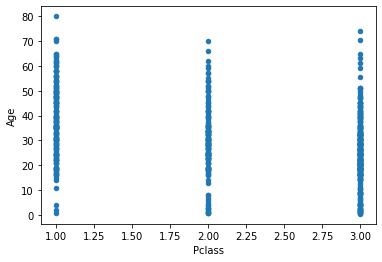

In [4]:
# pclass scatter plot///there are total 3 classes in this dataset//older people pay more
data.plot(x='Pclass', y = 'Age', kind = 'scatter')
plt.xlabel('Pclass')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

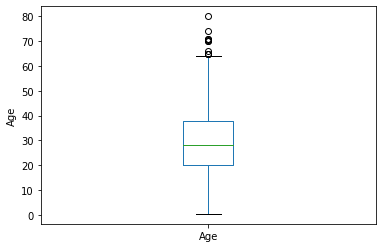

In [5]:
# ylabel only using boxplot
data.plot(y = 'Age', kind = 'box')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

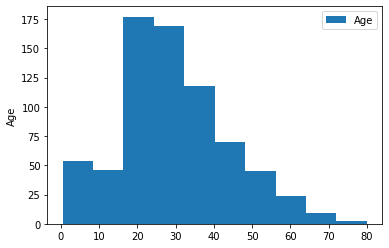

In [6]:
#histogram shows the freqency of measurements counted within certain bins or intervals
#arguments that can be changed(bins, range, normed-wether normalized to one, CDF)
data.plot(y='Age', kind = 'hist')
plt.ylabel('Age')

Text(0.5, 0, 'Age')

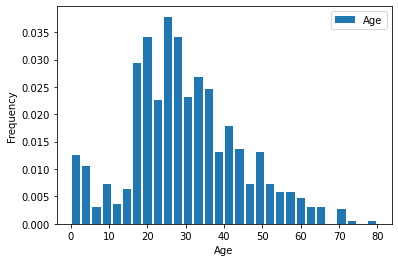

In [17]:
# normed is deprecated, updated to density
data.plot(y ='Age', kind = 'hist', bins =30, range =(0, 80), rwidth = 0.8, density = True)
plt.xlabel('Age')

Text(0.5, 1.0, 'Cululative Distribution Function CDF')

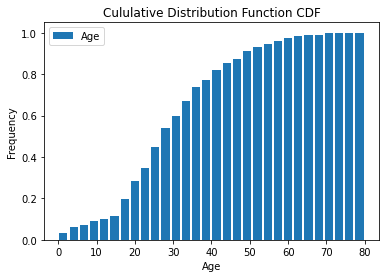

In [19]:
#using CDF/ adding all the frequency/ sharp increase meaning more data/ flatter curve means less change in data
data.plot(y='Age', kind='hist', bins = 30, range= (0, 80), rwidth = 0.8, density = True, cumulative = True)
plt.xlabel('Age')
plt.title('Cululative Distribution Function CDF')

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [26]:
data.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [28]:
data.quantile(q =0.5)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64

In [29]:
data.quantile(q = [0.25, 0.75])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.25,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
0.75,668.5,1.0,3.0,38.000,1.0,0.0,31.0000


In [31]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [38]:
#titanic unique embarking location
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
#saving people from s port into Embarked_S///index
indices = data['Embarked'] =='S'
Embarked_S = data.loc[indices, :]

In [40]:
Embarked_S.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [43]:
data['Pclass'].unique()

array([3, 1, 2])

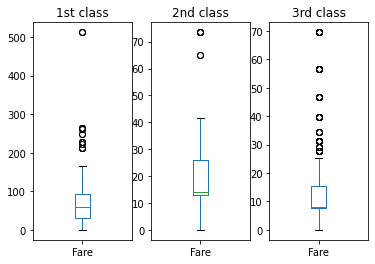

In [42]:
#display the box plots on 3 separate rows and 1 column
fig, axies = plt.subplots(nrows =1, ncols =3)

data.loc[data['Pclass']==1].plot(ax=axies[0], y='Fare', kind='box', title ='1st class')
data.loc[data['Pclass']==2].plot(ax=axies[1], y='Fare', kind ='box', title ='2nd class')
data.loc[data['Pclass']==3].plot(ax=axies[2], y='Fare', kind ='box', title ='3rd class')